In [4]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [6]:
df = pd.read_csv('../../data/dataset.csv')

In [7]:
df.sample(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
468,Peptic ulcer diseae,vomiting,indigestion,loss_of_appetite,abdominal_pain,passage_of_gases,internal_itching,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1591,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3769,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4830,Hypoglycemia,vomiting,fatigue,anxiety,sweating,headache,nausea,blurred_and_distorted_vision,excessive_hunger,drying_and_tingling_lips,slurred_speech,irritability,palpitations,NaN,NaN,NaN,NaN,NaN
1106,Dimorphic hemmorhoids(piles),constipation,pain_during_bowel_movements,pain_in_anal_region,irritation_in_anus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
symptom_cols = [f'Symptom_{i}' for i in range(1, 18)]
df[symptom_cols] = df[symptom_cols].fillna('')
df['Symptoms'] = df[symptom_cols].apply(lambda row: ', '.join(row), axis=1)

In [10]:
df.sample(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Symptoms
1151,Hypoglycemia,vomiting,fatigue,anxiety,sweating,headache,nausea,blurred_and_distorted_vision,excessive_hunger,drying_and_tingling_lips,slurred_speech,irritability,palpitations,,,,,,"vomiting, fatigue, anxiety, sweating, hea..."
980,Chicken pox,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body,,,,,,,"itching, skin_rash, fatigue, lethargy, hig..."
4876,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,,,,,,,,,,,,,,"burning_micturition, bladder_discomfort, fo..."
183,Typhoid,chills,vomiting,fatigue,high_fever,headache,nausea,constipation,diarrhoea,toxic_look_(typhos),belly_pain,,,,,,,,"chills, vomiting, fatigue, high_fever, he..."
3607,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,,,,,,,,,,,,,"skin_rash, high_fever, blister, red_sore_a..."


In [11]:
df = df[['Disease', 'Symptoms']]

In [12]:
df.sample(5)

,Disease,Symptoms
2636,Cervical spondylosis,"back_pain, weakness_in_limbs, neck_pain, d..."
4628,(vertigo) Paroymsal Positional Vertigo,"vomiting, headache, nausea, spinning_movem..."
1616,Urinary tract infection,"burning_micturition, bladder_discomfort, fo..."
4857,hepatitis A,"joint_pain, vomiting, yellowish_skin, dark..."
3236,Urinary tract infection,"burning_micturition, bladder_discomfort, fo..."


In [13]:
df['Symptoms'].nunique()

304

In [15]:
from collections import Counter

# Flatten all symptoms into one big list
all_symptoms = df['Symptoms'].str.split(', ').sum()

# Count each symptom
symptom_counts = Counter(all_symptoms)

# Convert to DataFrame for visualization
import pandas as pd
symptom_df = pd.DataFrame(symptom_counts.items(), columns=['Symptom', 'Count'])
symptom_df = symptom_df.sort_values(by='Count', ascending=False)


C:\Users\jayan\AppData\Local\Temp\ipykernel_11272\2459925003.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=symptom_df.head(20), x='Count', y='Symptom', palette='mako')


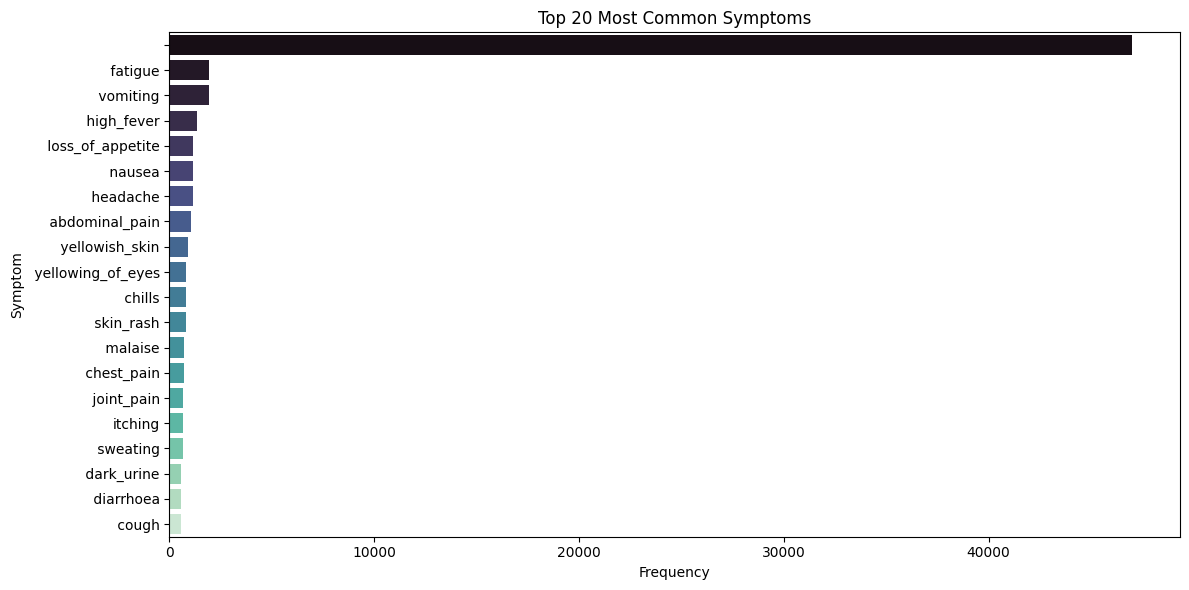

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=symptom_df.head(20), x='Count', y='Symptom', palette='mako')
plt.title('Top 20 Most Common Symptoms')
plt.xlabel('Frequency')
plt.ylabel('Symptom')
plt.tight_layout()
plt.show()


In [ ]:
mlb = MultiLabelBinarizer()
label = LabelEncoder()

AttributeError: 'MultiLabelBinarizer' object has no attribute 'classes_'

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(df['Symptoms'], df['Disease'], random_state=42, test_size=0.2)

In [20]:
X_train_encoded = pd.DataFrame(mlb.fit_transform(X_train), columns=mlb.classes_)
X_test_encoded = pd.DataFrame(mlb.transform(X_test), columns=mlb.classes_)
y_train_encoded = label.fit_transform(y_train)
y_test_encoded = label.transform(y_test)

In [21]:
X_train_encoded

,,(,),",",_,a,b,c,d,e,...,p,r,s,t,u,v,w,x,y,z
0,1,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
2,1,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
3,1,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0
4,1,0,0,1,1,1,0,1,1,1,...,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,1,0,0,1,1,1,0,0,1,1,...,1,1,1,1,1,1,0,0,1,0
3932,1,0,0,1,1,1,1,1,1,1,...,1,1,1,1,0,1,0,0,0,0
3933,1,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,0
3934,1,0,0,1,1,1,0,1,1,1,...,1,1,1,1,1,0,0,0,0,0


In [33]:
models = [
    SVC(probability=True),  # Important!!
    RandomForestClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # to avoid warnings
]

# Train and evaluate
for model in models:
    model.fit(X_train_encoded, y_train_encoded)
    
    print(f'{model.__class__.__name__} :')

    # Predict probabilities
    train_proba = model.predict_proba(X_train_encoded)
    test_proba = model.predict_proba(X_test_encoded)

    # ROC AUC
    train_auc = roc_auc_score(y_train_encoded, train_proba, multi_class='ovr')
    test_auc = roc_auc_score(y_test_encoded, test_proba, multi_class='ovr')

    print('Training AUC :', train_auc)
    print('Validation AUC :', test_auc)
    print()

SVC :
Training AUC : 0.9963571877513535
Validation AUC : 0.9954745471496492

RandomForestClassifier :
Training AUC : 0.9965341478605917
Validation AUC : 0.9957142680911778



c:\Users\jayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:35:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier :
Training AUC : 0.9965221926947768
Validation AUC : 0.9956736014819128



In [23]:
model = RandomForestClassifier()
model.fit(X_train_encoded, y_train_encoded)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
def predict_disease_from_symptoms(symptom_list, model, mlb, label_encoder):
    # Convert to binary array
    binary_input = mlb.transform([symptom_list])

    # Make sure it has column names for model input
    input_df = pd.DataFrame(binary_input, columns=mlb.classes_)

    # Predict
    prediction = model.predict(input_df)
    predicted_label = label_encoder.inverse_transform(prediction)

    return predicted_label[0]


In [25]:
user_symptoms = ['fever', 'cough', 'sore_throat']
predicted_disease = predict_disease_from_symptoms(user_symptoms, model, mlb, label)

print("🩺 Predicted Disease:", predicted_disease)


🩺 Predicted Disease: Cervical spondylosis


c:\Users\jayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['cough', 'fever', 'sore_throat'] will be ignored
  warnings.warn(
